# Lending Rate Data Analysis

## Introduction

Lending rate refers to the interest rate charged by a lender to a borrower for the use of borrowed funds. It is the cost of borrowing money and is typically expressed as a percentage.

## Factors that affect Lending Rates in Ghana

- **Monetary Policy**: The policies set by the Bank of Ghana, such as the benchmark interest rate (the policy rate), can directly impact lending rates in the country. Changes in the policy rate can lead to adjustments in commercial banks' lending rates.



- **Inflation**: High inflation can erode the purchasing power of money, leading to higher lending rates to compensate for the expected loss in the value of the loaned funds over time.



- **Credit Risk**: Lenders consider the creditworthiness of borrowers before setting lending rates. Higher credit risk associated with borrowers may result in higher interest rates to offset potential losses.



- **Market Competition**: A competitive banking sector can exert downward pressure on lending rates as banks vie for customers. Conversely, less competition can lead to higher lending rates.



- **Economic Conditions**: The overall health of the Ghanaian economy can influence lending rates. During periods of economic growth and stability, lending rates may be lower, while economic downturns may lead to higher rates.



- **Central Bank Regulations**: Central bank regulations and reserve requirements can affect the liquidity and cost of funds for commercial banks, influencing their lending rates.



- **Exchange Rates**: Ghana's lending rates can be affected by exchange rate fluctuations, especially if borrowers have exposure to foreign currencies, leading to potential currency risk.



- **Government Policy**: Government initiatives or policies that impact the financial sector can also have indirect effects on lending rates.


These factors interact with each other, and their combined influence determines the prevailing lending rates in Ghana.

In [5]:
#importing Packages

In [7]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

### Loading Dataset

In [8]:
lending_rate_data = pd.read_csv('lending_rate_data.csv')

### Performing Data Analysis

In [9]:
lending_rate_data.head()

,Year,Inflation(%),Economic Growth(%),Lending Rates(%)
0,2022.0,13.9,11.13,20.16
1,NaN,15.7,12.57,20.52
2,NaN,19.4,15.76,20.57
3,NaN,23.4,15.37,21.61
4,NaN,27.6,16.32,22.53


In [10]:
lending_rate_data.tail()

,Year,Inflation(%),Economic Growth(%),Lending Rates(%)
55,NaN,9.86,2.64,23.70
56,NaN,9.79,6.56,24.04
57,NaN,9.52,5.73,23.90
58,NaN,9.34,4.51,23.76
59,NaN,9.43,2.75,23.96


In [11]:
lending_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                5 non-null      float64
 1   Inflation(%)        60 non-null     float64
 2   Economic Growth(%)  60 non-null     float64
 3   Lending Rates(%)    60 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [12]:
def check_data(df):
    print(80 * "*")
    print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
    print(80 * "*")
    print("COLUMNS:\n")
    print(df.columns.values)
    print(80 * "*")
    print("DATA INFO:\n")
    print(df.dtypes)
    print(80 * "*")
    print("MISSING VALUES:\n")
    print(df.isnull().sum())
    print(80 * "*")
    print("NUMBER OF UNIQUE VALUES:\n")
    print(df.nunique())

In [14]:
check_data(lending_rate_data)

********************************************************************************
DIMENSION: (60, 4)
********************************************************************************
COLUMNS:

['Year' 'Inflation(%)' 'Economic Growth(%)' 'Lending Rates(%)']
********************************************************************************
DATA INFO:

Year                  float64
Inflation(%)          float64
Economic Growth(%)    float64
Lending Rates(%)      float64
dtype: object
********************************************************************************
MISSING VALUES:

Year                  55
Inflation(%)           0
Economic Growth(%)     0
Lending Rates(%)       0
dtype: int64
********************************************************************************
NUMBER OF UNIQUE VALUES:

Year                   5
Inflation(%)          53
Economic Growth(%)    60
Lending Rates(%)      59
dtype: int64


### Plotting Scattered Graph

In [13]:
x= lending_rate_data["Inflation(%)"]
y = lending_rate_data["Lending Rates(%)"]

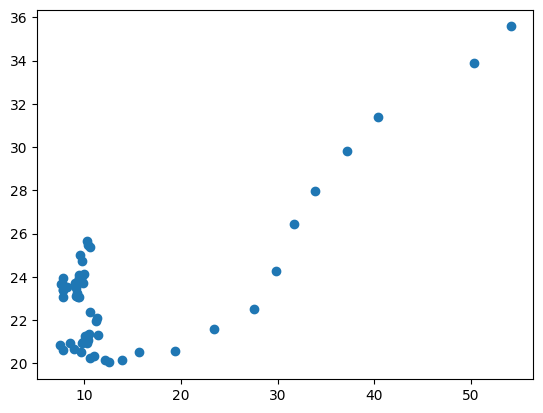

In [14]:
plt.scatter(x, y)

In [15]:
# The point been on the striaght lines means there is some kind of colleration between the two data column

In [16]:
x= lending_rate_data["Economic Growth(%)"]
y = lending_rate_data["Lending Rates(%)"]

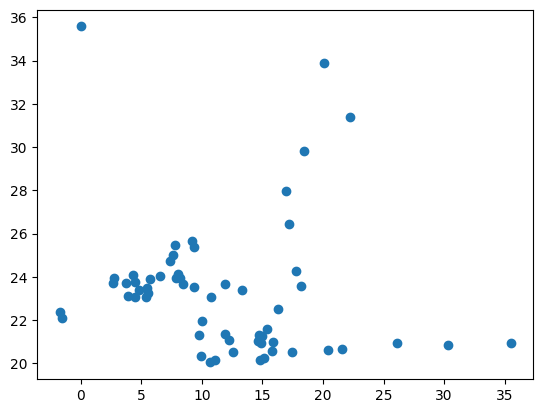

In [17]:
plt.scatter(x, y)

### preparing the train model

In [18]:
x_var = lending_rate_data[["Inflation(%)","Economic Growth(%)"]]
y_rar = lending_rate_data["Lending Rates(%)"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y_rar, test_size = 0.3)

### Trainning the model

In [71]:
rate_model = LinearRegression()
rate_model.fit(x_train, y_train)

LinearRegression()

In [64]:
print(rate_model.coef_)

[ 0.24819026 -0.10209489]


In [22]:
print(rate_model.intercept_)

20.920508572848444


In [23]:
pd.DataFrame(rate_model.coef_, x_var.columns, columns = ['Coeff'])

,Coeff
Inflation(%),0.248190
Economic Growth(%),-0.102095


In [24]:
predictions = rate_model.predict(x_test)

In [25]:
predictions

array([20.77569864, 22.70262456, 22.77815759, 34.34760139, 21.54537722,
       22.57514343, 20.95305497, 22.68054867, 21.75580962, 22.65606654,
       21.49648859, 24.12638401, 22.77486787, 22.55102565, 27.03108656,
       22.47442356, 19.68948117, 21.99578755])

In [26]:
y_test

17    20.61
40    23.08
58    23.76
11    35.58
19    20.51
53    24.14
18    20.67
56    24.04
24    23.06
38    23.26
25    23.37
2     20.57
36    23.73
48    25.64
6     26.46
54    23.94
16    20.85
32    21.30
Name: Lending Rates(%), dtype: float64

In [27]:
pd.DataFrame(predictions, y_test)

,0
Lending Rates(%),
20.61,20.775699
23.08,22.702625
23.76,22.778158
35.58,34.347601
20.51,21.545377
24.14,22.575143
20.67,20.953055
24.04,22.680549
23.06,21.755810


## Model Evaluation (Metrics for Regression)

### Mean Squared Error

Mean Squared Error, or MSE for short, is a popular error metric for regression problems.

It is also an important loss function for algorithms fit or optimized using the least squares framing of a regression problem. Here “least squares” refers to minimizing the mean squared error between predictions and expected values.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

MSE = 1 / N * sum for i to N (y_i – yhat_i)^2
Where y_i is the i’th expected value in the dataset and yhat_i is the i’th predicted value. The difference between these two values is squared, which has the effect of removing the sign, resulting in a positive error value.

>20.6, 20.8 = 0.027
>23.1, 22.7 = 0.142
>23.8, 22.8 = 0.964
>35.6, 34.3 = 1.519
>20.5, 21.5 = 1.072
>24.1, 22.6 = 2.449
>20.7, 21.0 = 0.080
>24.0, 22.7 = 1.848
>23.1, 21.8 = 1.701
>23.3, 22.7 = 0.365
>23.4, 21.5 = 3.510
>20.6, 24.1 = 12.648
>23.7, 22.8 = 0.912
>25.6, 22.6 = 9.542
>26.5, 27.0 = 0.326
>23.9, 22.5 = 2.148
>20.9, 19.7 = 1.347
>21.3, 22.0 = 0.484


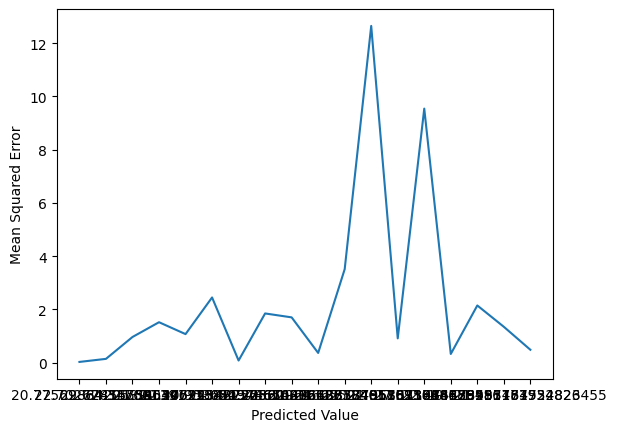

In [28]:
from sklearn.metrics import mean_squared_error
# real value
expected = y_test.tolist()
# predicted value
predicted = predictions.tolist()
# calculate errors
errors = list()
for i in range(len(expected)):
 # calculate error
 err = (expected[i] - predicted[i])**2
 # store error
 errors.append(err)
 # report error
 print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

In [29]:
expected = y_test.tolist()
predicted = predictions.tolist()
errors = mean_squared_error(expected, predicted)
errors

2.282459888963503

A perfect mean squared error value is 0.0, which means that all predictions matched the expected values exactly.

This is almost never the case, and if it happens, it suggests your predictive modeling problem is trivial.

A good MSE is relative to your specific dataset.

It is a good idea to first establish a baseline MSE for your dataset using a naive predictive model, such as predicting the mean target value from the training dataset. A model that achieves an MSE better than the MSE for the naive model has skill.

### Root Mean Squared Error

The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.

Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.

For example, if your target variable has the units “dollars,” then the RMSE error score will also have the unit “dollars” and not “squared dollars” like the MSE.

As such, it may be common to use MSE loss to train a regression predictive model, and to use RMSE to evaluate and report its performance.

The RMSE can be calculated as follows:

RMSE = sqrt(1 / N * sum for i to N (y_i – yhat_i)^2)
Where y_i is the i’th expected value in the dataset, yhat_i is the i’th predicted value, and sqrt() is the square root function.

We can restate the RMSE in terms of the MSE as:

RMSE = sqrt(MSE)

In [30]:
# example of calculate the root mean squared error
from sklearn.metrics import mean_squared_error
# real value
expected = y_test.tolist()
# predicted value
predicted = predictions.tolist()
# calculate errors
errors = mean_squared_error(expected, predicted, squared=False)
# report error
print(errors)

1.5107812180999283


### Mean Absolute Error

Mean Absolute Error, or MAE, is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted.

Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

That is, MSE and RMSE punish larger errors more than smaller errors, inflating or magnifying the mean error score. This is due to the square of the error value. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error.

As its name suggests, the MAE score is calculated as the average of the absolute error values. Absolute or abs() is a mathematical function that simply makes a number positive. Therefore, the difference between an expected and predicted value may be positive or negative and is forced to be positive when calculating the MAE.

The MAE can be calculated as follows:

MAE = 1 / N * sum for i to N abs(y_i – yhat_i)
Where y_i is the i’th expected value in the dataset, yhat_i is the i’th predicted value and abs() is the absolute function

>23.1, 22.0 = 1.093
>20.6, 24.0 = 3.458
>23.1, 23.1 = 0.015
>23.9, 23.0 = 0.851
>23.1, 23.2 = 0.119
>29.8, 27.9 = 1.949
>20.3, 22.8 = 2.495
>23.6, 21.8 = 1.862
>20.2, 23.4 = 3.195
>23.9, 22.7 = 1.195
>21.3, 22.0 = 0.746
>24.0, 22.4 = 1.608
>25.4, 22.8 = 2.569
>20.6, 20.7 = 0.069
>33.9, 30.7 = 3.155
>20.9, 18.8 = 2.115
>24.3, 26.2 = 1.932
>20.9, 21.9 = 0.935


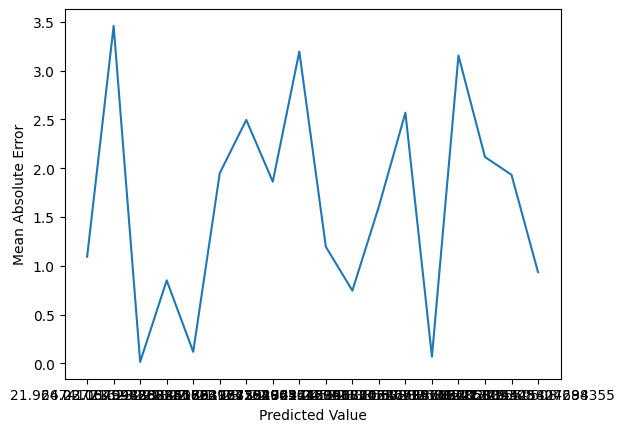

In [48]:
from sklearn.metrics import mean_squared_error
# real value
expected = y_test.tolist()
# predicted value
predicted = predictions.tolist()
# calculate errors
errors = list()
for i in range(len(expected)):
 # calculate error
 err = abs((expected[i] - predicted[i]))
 # store error
 errors.append(err)
 # report error
 print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Absolute Error')
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error
# real value
expected = y_test.tolist()
# predicted value
predicted = predictions.tolist()
# calculate errors
errors = mean_absolute_error(expected, predicted)
# report error
print(errors)

1.2375083512738796


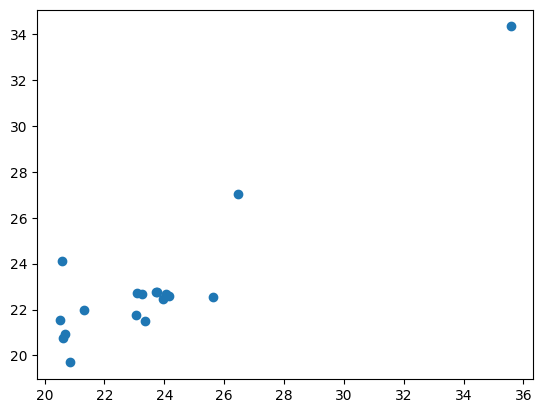

In [32]:
plt.scatter(y_test, predictions)

### Using Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
rate_model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [87]:
rate_model_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
y_pred = rate_model_rf.predict(x_test)
y_pred

array([23.3458, 23.7576, 23.6069, 30.9304, 21.9084, 24.905 , 21.8036,
       24.3687, 23.1351, 23.5786, 23.1309, 20.8898, 23.2999, 24.959 ,
       24.7881, 24.7307, 22.9248, 21.1226])

In [89]:
pd.DataFrame(y_pred, y_test)

,0
Lending Rates(%),
20.61,23.3458
23.08,23.7576
23.76,23.6069
35.58,30.9304
20.51,21.9084
24.14,24.9050
20.67,21.8036
24.04,24.3687
23.06,23.1351


>20.6, 23.3 = 7.485
>23.1, 23.8 = 0.459
>23.8, 23.6 = 0.023
>35.6, 30.9 = 21.619
>20.5, 21.9 = 1.956
>24.1, 24.9 = 0.585
>20.7, 21.8 = 1.285
>24.0, 24.4 = 0.108
>23.1, 23.1 = 0.006
>23.3, 23.6 = 0.102
>23.4, 23.1 = 0.057
>20.6, 20.9 = 0.102
>23.7, 23.3 = 0.185
>25.6, 25.0 = 0.464
>26.5, 24.8 = 2.795
>23.9, 24.7 = 0.625
>20.9, 22.9 = 4.305
>21.3, 21.1 = 0.031


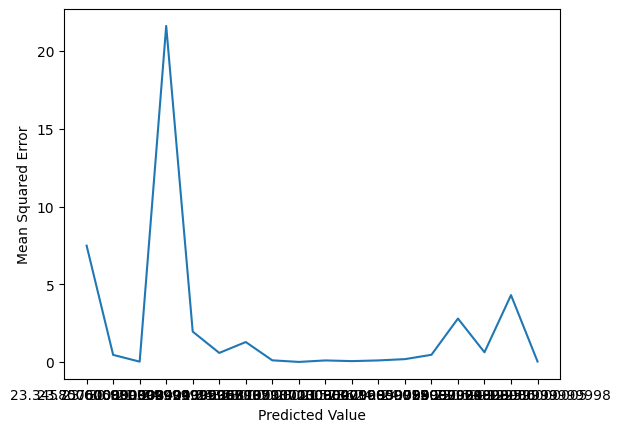

In [90]:
from sklearn.metrics import mean_squared_error
# real value
expected = y_test.tolist()
# predicted value
predicted = y_pred.tolist()
# calculate errors
errors = list()
for i in range(len(expected)):
 # calculate error
 err = (expected[i] - predicted[i])**2
 # store error
 errors.append(err)
 # report error
 print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

In [91]:
expected = y_test.tolist()
predicted = y_pred.tolist()
errors = mean_squared_error(expected, predicted)
errors

2.343992172777798

In [92]:
# example of calculate the root mean squared error
from sklearn.metrics import mean_squared_error
# real value
expected = y_pred.tolist()
# predicted value
predicted = predictions.tolist()
# calculate errors
errors = mean_squared_error(expected, predicted, squared=False)
# report error
print(errors)

2.0075077809881936


>20.6, 23.3 = 2.736
>23.1, 23.8 = 0.678
>23.8, 23.6 = 0.153
>35.6, 30.9 = 4.650
>20.5, 21.9 = 1.398
>24.1, 24.9 = 0.765
>20.7, 21.8 = 1.134
>24.0, 24.4 = 0.329
>23.1, 23.1 = 0.075
>23.3, 23.6 = 0.319
>23.4, 23.1 = 0.239
>20.6, 20.9 = 0.320
>23.7, 23.3 = 0.430
>25.6, 25.0 = 0.681
>26.5, 24.8 = 1.672
>23.9, 24.7 = 0.791
>20.9, 22.9 = 2.075
>21.3, 21.1 = 0.177


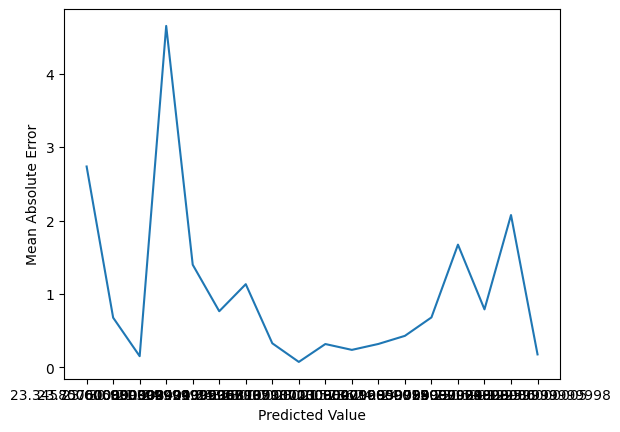

In [93]:
from sklearn.metrics import mean_squared_error
# real value
expected = y_test.tolist()
# predicted value
predicted = y_pred.tolist()
# calculate errors
errors = list()
for i in range(len(expected)):
 # calculate error
 err = abs((expected[i] - predicted[i]))
 # store error
 errors.append(err)
 # report error
 print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Absolute Error')
plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error
# real value
expected = y_test.tolist()
# predicted value
predicted = y_pred.tolist()
# calculate errors
errors = mean_absolute_error(expected, predicted)
# report error
print(errors)

1.0344611111111144


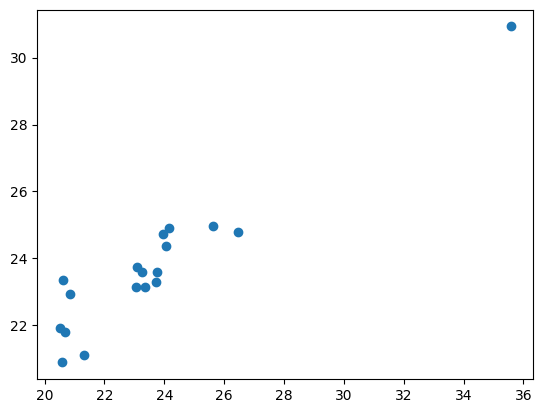

In [95]:
plt.scatter(y_test, y_pred)

## Model Saving and Reuse

In [57]:
import pickle

In [77]:
pkl_filename = "rate_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rate_model, file)

In [97]:
pkl_filename_rf = "rate_model_rf.pkl"
with open(pkl_filename_rf, 'wb') as file:
    pickle.dump(rate_model_rf, file)

In [81]:
with open(pkl_filename, 'rb') as file:
    rateModel = pickle.load(file)

In [98]:
with open(pkl_filename_rf, 'rb') as file:
    rateModelnf = pickle.load(file)

In [83]:
predict_rates = rateModel.predict(x_test)

In [99]:
predict_rates_rf = rateModelnf.predict(x_test)

In [84]:
predict_rates

array([20.77569864, 22.70262456, 22.77815759, 34.34760139, 21.54537722,
       22.57514343, 20.95305497, 22.68054867, 21.75580962, 22.65606654,
       21.49648859, 24.12638401, 22.77486787, 22.55102565, 27.03108656,
       22.47442356, 19.68948117, 21.99578755])

In [100]:
predict_rates_rf

array([23.3458, 23.7576, 23.6069, 30.9304, 21.9084, 24.905 , 21.8036,
       24.3687, 23.1351, 23.5786, 23.1309, 20.8898, 23.2999, 24.959 ,
       24.7881, 24.7307, 22.9248, 21.1226])

In [56]:
y_test

24    23.06
2     20.57
40    23.08
57    23.90
39    23.09
8     29.81
21    20.34
45    23.65
0     20.16
54    23.94
32    21.30
43    23.96
49    25.38
17    20.61
10    33.87
15    20.93
5     24.27
34    20.95
Name: Lending Rates(%), dtype: float64

In [57]:
pd.DataFrame(predict_rates, y_test)

,0
Lending Rates(%),
23.06,21.966741
20.57,24.027716
23.08,23.064598
23.90,23.048888
23.09,23.208846
29.81,27.861262
20.34,22.834964
23.65,21.787593
20.16,23.354904


In [103]:
pd.DataFrame(predict_rates_rf, y_test)

,0
Lending Rates(%),
20.61,23.3458
23.08,23.7576
23.76,23.6069
35.58,30.9304
20.51,21.9084
24.14,24.9050
20.67,21.8036
24.04,24.3687
23.06,23.1351


In [107]:
pd.DataFrame([predict_rates_rf, predict_rates, y_test])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,23.345800,23.757600,23.606900,30.930400,21.908400,24.905000,21.803600,24.368700,23.13510,23.578600,23.130900,20.889800,23.299900,24.959000,24.788100,24.730700,22.924800,21.122600
1,20.775699,22.702625,22.778158,34.347601,21.545377,22.575143,20.953055,22.680549,21.75581,22.656067,21.496489,24.126384,22.774868,22.551026,27.031087,22.474424,19.689481,21.995788
2,20.610000,23.080000,23.760000,35.580000,20.510000,24.140000,20.670000,24.040000,23.06000,23.260000,23.370000,20.570000,23.730000,25.640000,26.460000,23.940000,20.850000,21.300000


## Deployment